# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` module.

In [2]:
import pandas_datareader.data as web

> Let's start & end dates--we are interested in year 2022 until August.

In [3]:
start = datetime.datetime(2022, 1, 2)
end = datetime.datetime(2022, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [4]:
apple = web.DataReader("AAPL", "yahoo", start, end)
google = web.DataReader("GOOGL", "yahoo", start, end)

> You may save the data to csv files.

In [5]:
apple.to_csv("apple_2022_stock.csv")
google.to_csv("google_2022_stock.csv")

> Let's read the stored files.

In [6]:
apple_2022 = pd.read_csv("apple_2022_stock.csv", index_col=0, parse_dates=True)
google_2022 = pd.read_csv("google_2022_stock.csv", index_col=0, parse_dates=True)

#### Have a quick look at your data.

In [7]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.291183
2022-01-07,174.139999,171.029999,172.889999,172.169998,86709100.0,171.460495


In [8]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
2022-01-04,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
2022-01-05,144.499496,137.688004,144.419998,137.774994,54618000.0,137.774994
2022-01-06,139.940002,136.558502,136.998505,137.747498,37348000.0,137.747498
2022-01-07,138.448502,135.766495,138.145493,137.016998,29760000.0,137.016998


In [9]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000
mean,161.601078,157.420239,159.458922,159.563713,8.809619e+07,159.212692
std,12.526432,12.788903,12.797012,12.639174,2.358288e+07,12.531554
min,132.389999,129.039993,130.070007,130.059998,5.121820e+07,129.879593
25%,151.044998,146.849998,148.965004,149.040001,7.192255e+07,148.833267
50%,164.520004,159.630005,162.250000,162.509995,8.373720e+07,162.275848
75%,171.845001,168.180000,170.110001,170.059998,9.751640e+07,169.616478
max,182.940002,179.119995,182.630005,182.009995,1.826020e+08,181.259933


In [10]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000
mean,125.500282,121.929503,123.782874,123.639299,3.660019e+07,123.639299
std,11.721500,11.666856,11.938701,11.616026,1.419815e+07,11.616026
min,106.458504,101.884499,104.985497,105.019997,1.587040e+07,105.019997
25%,115.609749,112.540001,113.442501,113.896000,2.675600e+07,113.896000
50%,121.489998,118.511002,120.120003,119.635498,3.505000e+07,119.635498
75%,136.249748,132.964996,134.753250,134.371002,4.105000e+07,134.371002
max,151.546494,145.522507,151.250000,148.000000,1.232000e+08,148.000000


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2022

In [11]:
apple_07 = apple.loc["2022-07"][["Adj Close"]]
apple_08 = apple.loc["2022-08"][["Adj Close"]]

In [12]:
apple_07.head()

,Adj Close
Date,
2022-07-01,138.737274
2022-07-05,141.363632
2022-07-06,142.721756
2022-07-07,146.147003
2022-07-08,146.836029


In [13]:
apple_08.head()

,Adj Close
Date,
2022-08-01,161.285965
2022-08-02,159.788040
2022-08-03,165.899567
2022-08-04,165.580002
2022-08-05,165.350006


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [14]:
apple_073 = apple_07.head(3)
apple_083 = apple_08.head(3)
frame = [apple_073, apple_083]
pd.concat(frame)

,Adj Close
Date,
2022-07-01,138.737274
2022-07-05,141.363632
2022-07-06,142.721756
2022-08-01,161.285965
2022-08-02,159.788040
2022-08-03,165.899567


#### Question 1-2. How would you extract only the 2022 August GOOGL values?

In [15]:
google_08 = google.loc['2022-08'][['Adj Close']]

In [16]:
google_08

,Adj Close
Date,
2022-08-01,114.860001
2022-08-02,115.129997
2022-08-03,118.080002
2022-08-04,118.190002
2022-08-05,117.470001
2022-08-08,117.300003
2022-08-09,116.629997
2022-08-10,119.699997
2022-08-11,118.839996


#### Question 1-3. Please concatenate the AAPL and GOOGL 2022 August stock data--there will be duplicate index labels

In [17]:
frame = [apple_08.head(3), google_08.head(3)]
apple_google_df = pd.concat(frame)
apple_google_df

,Adj Close
Date,
2022-08-01,161.285965
2022-08-02,159.788040
2022-08-03,165.899567
2022-08-01,114.860001
2022-08-02,115.129997
2022-08-03,118.080002


> Let's see the `two records for data of 2022-08-03`

In [18]:
apple_google_df.loc['2022-08-03']

,Adj Close
Date,
2022-08-03,165.899567
2022-08-03,118.080002


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [19]:
apple_google_df = pd.concat(frame, keys = ['AAPL', "GOOGL"])
apple_google_df

Adj Close
      Date                  
AAPL  2022-08-01  161.285965
      2022-08-02  159.788040
      2022-08-03  165.899567
GOOGL 2022-08-01  114.860001
      2022-08-02  115.129997
      2022-08-03  118.080002

> Let's extract just GOOGL values using `.loc`

In [20]:
apple_google_df.loc['GOOGL']

,Adj Close
Date,
2022-08-01,114.860001
2022-08-02,115.129997
2022-08-03,118.080002


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [21]:
frame = [apple.iloc[:, 4:], google.iloc[:, 4:]]
apple_google_df2 = pd.concat(frame)
apple_google_df2 = apple_google_df2[['Adj Close', 'Volume']]

In [22]:
apple_google_df2

,Adj Close,Volume
Date,,
2022-01-03,181.259933,104487900.0
2022-01-04,178.959457,99310400.0
2022-01-05,174.199142,94537600.0
2022-01-06,171.291183,96904000.0
2022-01-07,171.460495,86709100.0
...,...,...
2022-08-25,116.650002,16956800.0
2022-08-26,110.339996,37245700.0
2022-08-29,109.419998,21191200.0


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [23]:
google_a = pd.DataFrame()
google_a['Adj Close'] = google.iloc[:, 5]
apple_adjv_df = apple.iloc[:, 4:]
frame = [apple_adjv_df, google_a]
apple_google_df3 = pd.concat(frame, axis = 0)
apple_google_df3 = apple_google_df3[["Adj Close", "Volume"]]

In [24]:
apple_google_df3

,Adj Close,Volume
Date,,
2022-01-03,181.259933,104487900.0
2022-01-04,178.959457,99310400.0
2022-01-05,174.199142,94537600.0
2022-01-06,171.291183,96904000.0
2022-01-07,171.460495,86709100.0
...,...,...
2022-08-25,116.650002,NaN
2022-08-26,110.339996,NaN
2022-08-29,109.419998,NaN


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [25]:
frame = [apple_adjv_df, google_a]
apple_google_df4 = pd.concat(frame, join = 'inner')

In [26]:
apple_google_df4

,Adj Close
Date,
2022-01-03,181.259933
2022-01-04,178.959457
2022-01-05,174.199142
2022-01-06,171.291183
2022-01-07,171.460495
...,...
2022-08-25,116.650002
2022-08-26,110.339996
2022-08-29,109.419998


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [27]:
frame = [apple_adjv_df, google_a]
apple_google_df5 = pd.concat(frame, axis = 1)
apple_google_df5['Adj Close']

,Adj Close,Adj Close
Date,,
2022-01-03,181.259933,144.991501
2022-01-04,178.959457,144.399506
2022-01-05,174.199142,137.774994
2022-01-06,171.291183,137.747498
2022-01-07,171.460495,137.016998
...,...,...
2022-08-25,170.029999,116.650002
2022-08-26,163.619995,110.339996
2022-08-29,161.380005,109.419998


#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [28]:
google_df = google.iloc[:, 4:].head(3)
google_df = google_df[["Adj Close", "Volume"]]

In [29]:
apple_df = apple.iloc[:, 4:].head(5)
apple_df = apple_df[["Adj Close", "Volume"]]

In [30]:
frame = [apple_df, google_df]
apple_google_df6 = pd.concat(frame, axis = 1, keys = ['AAPL', "GOOGL"])

In [31]:
apple_google_df6

AAPL                    GOOGL            
             Adj Close       Volume   Adj Close      Volume
Date                                                       
2022-01-03  181.259933  104487900.0  144.991501  28646000.0
2022-01-04  178.959457   99310400.0  144.399506  28400000.0
2022-01-05  174.199142   94537600.0  137.774994  54618000.0
2022-01-06  171.291183   96904000.0         NaN         NaN
2022-01-07  171.460495   86709100.0         NaN         NaN

#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [32]:
frame = [apple_df, google_df]
apple_google_df7 = pd.concat(frame, join = 'inner', axis = 1, keys = ['AAPL', 'GOOGL'])

In [33]:
apple_google_df7

AAPL                    GOOGL            
             Adj Close       Volume   Adj Close      Volume
Date                                                       
2022-01-03  181.259933  104487900.0  144.991501  28646000.0
2022-01-04  178.959457   99310400.0  144.399506  28400000.0
2022-01-05  174.199142   94537600.0  137.774994  54618000.0

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [34]:
apple_df2 = apple.iloc[:, 4:].head(3)
google_df2 = google.iloc[:, 4:].head(3)

In [35]:
frame = [apple_df2, google_df2]
apple_google_df8 = pd.concat(frame, join = 'inner', ignore_index = True)

In [36]:
apple_google_df8[['Adj Close']]

,Adj Close
0,181.259933
1,178.959457
2,174.199142
3,144.991501
4,144.399506
5,137.774994


### `Now let's merging DataFrame objects`

In [37]:
apple_date = pd.DataFrame(apple.index)
apple_adj = apple[['Adj Close']].reset_index(drop = True)

In [38]:
frame = [apple_date, apple_adj]
apple_date_df = pd.concat(frame, axis = 1)

In [39]:
apple_date_df

,Date,Adj Close
0,2022-01-03,181.259933
1,2022-01-04,178.959457
2,2022-01-05,174.199142
3,2022-01-06,171.291183
4,2022-01-07,171.460495
...,...,...
162,2022-08-25,170.029999
163,2022-08-26,163.619995
164,2022-08-29,161.380005
165,2022-08-30,158.910004


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [40]:
apple_date1 = pd.DataFrame(apple.index).head()
apple_df3 = apple[['Adj Close', "Volume"]].reset_index(drop = True)

In [41]:
frame = [apple_date1, apple_df3]
appledate_df = pd.concat(frame, axis = 1, join = 'inner')

In [42]:
appledate_df

,Date,Adj Close,Volume
0,2022-01-03,181.259933,104487900.0
1,2022-01-04,178.959457,99310400.0
2,2022-01-05,174.199142,94537600.0
3,2022-01-06,171.291183,96904000.0
4,2022-01-07,171.460495,86709100.0


#### Question 3-2. Please use the merge function to create the below.

In [43]:
appledate_df1 = pd.merge(left = apple_date1.iloc[2:4], right = apple_df3, how = 'inner', right_index = True, left_index = True)

In [44]:
appledate_df1

,Date,Adj Close,Volume
2,2022-01-05,174.199142,94537600.0
3,2022-01-06,171.291183,96904000.0


#### Question 3-3. How would you create the below then?

In [45]:
apple_adj_df4 = apple[['Adj Close']].head()
apple_vol_df = apple[['Volume']].iloc[2:4]

In [46]:
frame = [apple_adj_df4, apple_vol_df]
apple_adjvol_df = pd.concat(frame, axis = 1)
apple_adjvol_df = apple_adjvol_df.reset_index(drop = True)

In [47]:
apple_df5 = pd.merge(left = apple_date1, right = apple_adjvol_df, how = 'outer', left_index = True, right_index = True)

In [48]:
apple_df5

,Date,Adj Close,Volume
0,2022-01-03,181.259933,NaN
1,2022-01-04,178.959457,NaN
2,2022-01-05,174.199142,94537600.0
3,2022-01-06,171.291183,96904000.0
4,2022-01-07,171.460495,NaN


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [49]:
apple['Symbol'] = 'AAPL'
google['Symbol'] = 'GOOGL'

In [50]:
apple = apple[['Symbol', 'High', "Low", "Open", "Close", "Volume", "Adj Close"]]
apple

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2022-01-03,AAPL,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
2022-01-04,AAPL,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
2022-01-05,AAPL,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142
2022-01-06,AAPL,175.300003,171.639999,172.699997,172.000000,96904000.0,171.291183
2022-01-07,AAPL,174.139999,171.029999,172.889999,172.169998,86709100.0,171.460495
...,...,...,...,...,...,...,...
2022-08-25,AAPL,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
2022-08-26,AAPL,171.050003,163.559998,170.570007,163.619995,78961000.0,163.619995
2022-08-29,AAPL,162.899994,159.820007,161.149994,161.380005,73314000.0,161.380005


In [51]:
google = google[['Symbol', "High", "Low", "Open", "Close", "Volume", "Adj Close"]]
google

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2022-01-03,GOOGL,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
2022-01-04,GOOGL,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
2022-01-05,GOOGL,144.499496,137.688004,144.419998,137.774994,54618000.0,137.774994
2022-01-06,GOOGL,139.940002,136.558502,136.998505,137.747498,37348000.0,137.747498
2022-01-07,GOOGL,138.448502,135.766495,138.145493,137.016998,29760000.0,137.016998
...,...,...,...,...,...,...,...
2022-08-25,GOOGL,116.720001,114.110001,114.239998,116.650002,16956800.0,116.650002
2022-08-26,GOOGL,115.120003,110.190002,114.720001,110.339996,37245700.0,110.339996
2022-08-29,GOOGL,110.949997,108.800003,109.989998,109.419998,21191200.0,109.419998


#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [52]:
frame = [apple, google]
apple_google_df9 = pd.concat(frame).sort_index(ascending = True)

In [53]:
apple_google_df9

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2022-01-03,AAPL,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
2022-01-03,GOOGL,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
2022-01-04,GOOGL,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
2022-01-04,AAPL,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
2022-01-05,AAPL,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142
...,...,...,...,...,...,...,...
2022-08-29,AAPL,162.899994,159.820007,161.149994,161.380005,73314000.0,161.380005
2022-08-30,GOOGL,110.500000,107.800003,110.169998,108.940002,27513300.0,108.940002
2022-08-30,AAPL,162.559998,157.720001,162.130005,158.910004,77906200.0,158.910004


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [54]:
apple_df6 = apple.copy()
google_df1 = google.copy()

apple_df6["Date"] = apple_df6.index
apple_df6 = apple_df6[["Date", "Symbol", "High", "Low", "Open", "Close", "Volume", "Adj Close"]]
apple_df6 = apple_df6.reset_index(drop = True)

google_df1['Date'] = google_df1.index
google_df1 = google_df1[['Date', 'Symbol', 'High', "Low", "Open", "Close", "Volume", "Adj Close"]]
google_df1 = google_df1.reset_index(drop = True)

In [55]:
frame = [apple_df6, google_df1]
apple_google_df10 = pd.concat(frame, join = 'inner').sort_values(by = "Date")

In [56]:
apple_google_df10.head()

,Date,Symbol,High,Low,Open,Close,Volume,Adj Close
0,2022-01-03,AAPL,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
0,2022-01-03,GOOGL,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
1,2022-01-04,GOOGL,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
1,2022-01-04,AAPL,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
2,2022-01-05,AAPL,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [57]:
apple_google_df11 = apple_google_df10.pivot(index = "Date", columns = "Symbol", values = "Adj Close")
apple_google_df11

Symbol,AAPL,GOOGL
Date,,
2022-01-03,181.259933,144.991501
2022-01-04,178.959457,144.399506
2022-01-05,174.199142,137.774994
2022-01-06,171.291183,137.747498
2022-01-07,171.460495,137.016998
...,...,...
2022-08-25,170.029999,116.650002
2022-08-26,163.619995,110.339996
2022-08-29,161.380005,109.419998


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [58]:
apple_google_df12 = apple_google_df11.stack( )
apple_google_df12

Date        Symbol
2022-01-03  AAPL      181.259933
            GOOGL     144.991501
2022-01-04  AAPL      178.959457
            GOOGL     144.399506
2022-01-05  AAPL      174.199142
                         ...    
2022-08-29  GOOGL     109.419998
2022-08-30  AAPL      158.910004
            GOOGL     108.940002
2022-08-31  AAPL      157.220001
            GOOGL     108.220001
Length: 334, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [59]:
apple_google_df12.loc["2022-01-04"]["AAPL"]

178.95945739746094

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [60]:
apple_google_df12.loc['2022-01-04']

Symbol
AAPL     178.959457
GOOGL    144.399506
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [61]:
apple_google_df12.loc[:, "GOOGL"]

Date
2022-01-03    144.991501
2022-01-04    144.399506
2022-01-05    137.774994
2022-01-06    137.747498
2022-01-07    137.016998
                 ...    
2022-08-25    116.650002
2022-08-26    110.339996
2022-08-29    109.419998
2022-08-30    108.940002
2022-08-31    108.220001
Length: 167, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [62]:
apple_google_df12.unstack().head(3)

Symbol,AAPL,GOOGL
Date,,
2022-01-03,181.259933,144.991501
2022-01-04,178.959457,144.399506
2022-01-05,174.199142,137.774994


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [63]:
apple_google_df13 = apple_google_df10.melt(id_vars = ["Date", "Symbol"])
apple_google_df13.head()

,Date,Symbol,variable,value
0,2022-01-03,AAPL,High,182.880005
1,2022-01-03,GOOGL,High,145.850998
2,2022-01-04,GOOGL,High,146.485001
3,2022-01-04,AAPL,High,182.940002
4,2022-01-05,AAPL,High,180.169998


#### Question 6-2. Please extract the values for the data for Google on 2022-08-24

In [64]:
apple_google_df14 = apple_google_df13[apple_google_df13.Date == '2022-08-24']
apple_google_df14[apple_google_df14.Symbol == "GOOGL"]

,Date,Symbol,variable,value
323,2022-08-24,GOOGL,High,1.147800e+02
657,2022-08-24,GOOGL,Low,1.128700e+02
991,2022-08-24,GOOGL,Open,1.135000e+02
1325,2022-08-24,GOOGL,Close,1.136900e+02
1659,2022-08-24,GOOGL,Volume,1.773460e+07
1993,2022-08-24,GOOGL,Adj Close,1.136900e+02


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [65]:
apple_google_df15 = apple_google_df10[["Date", "Symbol", "Adj Close"]]

In [66]:
apple_google_df15 = apple_google_df15.reset_index(drop = True)
apple_google_df15

,Date,Symbol,Adj Close
0,2022-01-03,AAPL,181.259933
1,2022-01-03,GOOGL,144.991501
2,2022-01-04,GOOGL,144.399506
3,2022-01-04,AAPL,178.959457
4,2022-01-05,AAPL,174.199142
...,...,...,...
329,2022-08-29,AAPL,161.380005
330,2022-08-30,GOOGL,108.940002
331,2022-08-30,AAPL,158.910004
332,2022-08-31,AAPL,157.220001


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [67]:
from datetime import datetime

In [68]:
apple_google_df15["Date"] = apple_google_df15["Date"].astype(str)

In [69]:
apple_google_df15["Date"] = apple_google_df15["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [70]:
apple_google_df15['Year'] = pd.DatetimeIndex(apple_google_df15["Date"]).year
apple_google_df15['Month'] = pd.DatetimeIndex(apple_google_df15['Date']).month
apple_google_df15 = apple_google_df15[['Date', "Year", 'Month', "Symbol", "Adj Close"]]
apple_google_df15

,Date,Year,Month,Symbol,Adj Close
0,2022-01-03,2022,1,AAPL,181.259933
1,2022-01-03,2022,1,GOOGL,144.991501
2,2022-01-04,2022,1,GOOGL,144.399506
3,2022-01-04,2022,1,AAPL,178.959457
4,2022-01-05,2022,1,AAPL,174.199142
...,...,...,...,...,...
329,2022-08-29,2022,8,AAPL,161.380005
330,2022-08-30,2022,8,GOOGL,108.940002
331,2022-08-30,2022,8,AAPL,158.910004
332,2022-08-31,2022,8,AAPL,157.220001


> Let's group by the Symbol column

In [71]:
apple_google_df15.groupby("Symbol")

> Here, please save the result!

In [72]:
apple_google_df16 = apple_google_df15.groupby("Symbol")

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [73]:
type(apple_google_df16.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [74]:
apple_google_df16.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 28, 31, 32, 35, 37, 39, 41, 42, 44, 46, 48, 50, 52, 54, 56, 59, 61, 63, 64, 67, 68, 71, 73, 74, 77, 78, 81, 82, 84, 86, 89, 90, 93, 94, 97, 99, 100, 103, 105, 106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 130, 133, 134, 136, 138, 140, 142, 145, 147, 148, 151, 152, 155, 157, 158, 161, 162, 165, 167, 168, 171, 173, 175, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 197, 199, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 30, 33, 34, 36, 38, 40, 43, 45, 47, 49, 51, 53, 55, 57, 58, 60, 62, 65, 66, 69, 70, 72, 75, 76, 79, 80, 83, 85, 87, 88, 91, 92, 95, 96, 98, 101, 102, 104, 107, 109, 111, 113, 114, 116, 118, 120, 122, 124, 126, 128, 131, 132, 135, 137, 139, 141, 143, 144, 146, 149, 150, 153, 154, 156, 159, 160, 163, 164, 166, 169, 170, 172, 174, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 196, 198, ...]}

> Yes, this reports the number of groups that resulted from the grouping

In [75]:
for method, group in apple_google_df16:
    print(group.shape)

(167, 5)
(167, 5)


### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

In [76]:
def content(groupdf):
    for symbol, frame in groupdf:
        print(symbol, '\n', frame.head())

###  When you execute your function you should see the following results.

In [77]:
content(apple_google_df16)

AAPL 
         Date  Year  Month Symbol   Adj Close
0 2022-01-03  2022      1   AAPL  181.259933
3 2022-01-04  2022      1   AAPL  178.959457
4 2022-01-05  2022      1   AAPL  174.199142
6 2022-01-06  2022      1   AAPL  171.291183
8 2022-01-07  2022      1   AAPL  171.460495
GOOGL 
         Date  Year  Month Symbol   Adj Close
1 2022-01-03  2022      1  GOOGL  144.991501
2 2022-01-04  2022      1  GOOGL  144.399506
5 2022-01-05  2022      1  GOOGL  137.774994
7 2022-01-06  2022      1  GOOGL  137.747498
9 2022-01-07  2022      1  GOOGL  137.016998


> .size will tell us the count of items in each group

In [78]:
apple_google_df16.size()

Symbol
AAPL     167
GOOGL    167
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [79]:
apple_google_df16.get_group('AAPL')

,Date,Year,Month,Symbol,Adj Close
0,2022-01-03,2022,1,AAPL,181.259933
3,2022-01-04,2022,1,AAPL,178.959457
4,2022-01-05,2022,1,AAPL,174.199142
6,2022-01-06,2022,1,AAPL,171.291183
8,2022-01-07,2022,1,AAPL,171.460495
...,...,...,...,...,...
325,2022-08-25,2022,8,AAPL,170.029999
327,2022-08-26,2022,8,AAPL,163.619995
329,2022-08-29,2022,8,AAPL,161.380005
331,2022-08-30,2022,8,AAPL,158.910004


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [80]:
apple_google_df17 = apple_google_df15.groupby(["Symbol", "Year", "Month"])
content(apple_google_df17)

('AAPL', 2022, 1) 
         Date  Year  Month Symbol   Adj Close
0 2022-01-03  2022      1   AAPL  181.259933
3 2022-01-04  2022      1   AAPL  178.959457
4 2022-01-05  2022      1   AAPL  174.199142
6 2022-01-06  2022      1   AAPL  171.291183
8 2022-01-07  2022      1   AAPL  171.460495
('AAPL', 2022, 2) 
          Date  Year  Month Symbol   Adj Close
41 2022-02-01  2022      2   AAPL  173.890427
42 2022-02-02  2022      2   AAPL  175.115356
44 2022-02-03  2022      2   AAPL  172.187469
46 2022-02-04  2022      2   AAPL  171.898315
48 2022-02-07  2022      2   AAPL  171.170395
('AAPL', 2022, 3) 
          Date  Year  Month Symbol   Adj Close
78 2022-03-01  2022      3   AAPL  162.734512
81 2022-03-02  2022      3   AAPL  166.084946
82 2022-03-03  2022      3   AAPL  165.755875
84 2022-03-04  2022      3   AAPL  162.704605
86 2022-03-07  2022      3   AAPL  158.845657
('AAPL', 2022, 4) 
           Date  Year  Month Symbol   Adj Close
125 2022-04-01  2022      4   AAPL  173.812836
127 

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [81]:
apple_google_df18 = apple_google_df15.set_index(["Symbol", "Year", "Month"])

In [82]:
apple_google_df18

Date   Adj Close
Symbol Year Month                       
AAPL   2022 1     2022-01-03  181.259933
GOOGL  2022 1     2022-01-03  144.991501
            1     2022-01-04  144.399506
AAPL   2022 1     2022-01-04  178.959457
            1     2022-01-05  174.199142
...                      ...         ...
            8     2022-08-29  161.380005
GOOGL  2022 8     2022-08-30  108.940002
AAPL   2022 8     2022-08-30  158.910004
            8     2022-08-31  157.220001
GOOGL  2022 8     2022-08-31  108.220001

[334 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [83]:
content(apple_google_df18.sort_index(sort_remaining = True).groupby("Symbol"))

AAPL 
                         Date   Adj Close
Symbol Year Month                       
AAPL   2022 1     2022-01-03  181.259933
            1     2022-01-04  178.959457
            1     2022-01-05  174.199142
            1     2022-01-06  171.291183
            1     2022-01-07  171.460495
GOOGL 
                         Date   Adj Close
Symbol Year Month                       
GOOGL  2022 1     2022-01-03  144.991501
            1     2022-01-04  144.399506
            1     2022-01-05  137.774994
            1     2022-01-06  137.747498
            1     2022-01-07  137.016998


#### Question 9-3. Please group by three levels in the index using their names

In [84]:
content(apple_google_df18.sort_index(sort_remaining = True).groupby(["Symbol", "Year", "Month"]))

('AAPL', 2022, 1) 
                         Date   Adj Close
Symbol Year Month                       
AAPL   2022 1     2022-01-03  181.259933
            1     2022-01-04  178.959457
            1     2022-01-05  174.199142
            1     2022-01-06  171.291183
            1     2022-01-07  171.460495
('AAPL', 2022, 2) 
                         Date   Adj Close
Symbol Year Month                       
AAPL   2022 2     2022-02-01  173.890427
            2     2022-02-02  175.115356
            2     2022-02-03  172.187469
            2     2022-02-04  171.898315
            2     2022-02-07  171.170395
('AAPL', 2022, 3) 
                         Date   Adj Close
Symbol Year Month                       
AAPL   2022 3     2022-03-01  162.734512
            3     2022-03-02  166.084946
            3     2022-03-03  165.755875
            3     2022-03-04  162.704605
            3     2022-03-07  158.845657
('AAPL', 2022, 4) 
                         Date   Adj Close
Symbol Year Month 

### Remember `agg`?

### Question 10-1. Use `numpy` apply the mean function to each group.

In [85]:
apple_google_df19 = apple_google_df18.groupby(['Symbol', 'Year', 'Month']).agg('mean')
apple_google_df19

Adj Close
Symbol Year Month            
AAPL   2022 1      169.161501
            2      169.310666
            3      164.838939
            4      166.345195
            5      148.179920
            6      139.604655
            7      149.462888
            8      166.845809
GOOGL  2022 1      135.961949
            2      136.712895
            3      134.977957
            4      128.071250
            5      113.194119
            6      112.429524
            7      112.650724
            8      116.258696

#### Question 10-2. How would you obtain the below then?

In [86]:
apple_google_df15

,Date,Year,Month,Symbol,Adj Close
0,2022-01-03,2022,1,AAPL,181.259933
1,2022-01-03,2022,1,GOOGL,144.991501
2,2022-01-04,2022,1,GOOGL,144.399506
3,2022-01-04,2022,1,AAPL,178.959457
4,2022-01-05,2022,1,AAPL,174.199142
...,...,...,...,...,...
329,2022-08-29,2022,8,AAPL,161.380005
330,2022-08-30,2022,8,GOOGL,108.940002
331,2022-08-30,2022,8,AAPL,158.910004
332,2022-08-31,2022,8,AAPL,157.220001


#### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

In [87]:
apple_google_df20 = apple_google_df18.groupby(["Symbol", "Year", 'Month'])['Adj Close'].agg(['mean', 'std'])
apple_google_df20


mean       std
Symbol Year Month                      
AAPL   2022 1      169.161501  6.732714
            2      169.310666  4.657830
            3      164.838939  7.912917
            4      166.345195  5.984378
            5      148.179920  7.815084
            6      139.604655  6.300430
            7      149.462888  5.894759
            8      166.845809  4.997062
GOOGL  2022 1      135.961949  5.022696
            2      136.712895  5.129184
            3      134.977957  5.183414
            4      128.071250  8.479011
            5      113.194119  3.993092
            6      112.429524  3.918163
            7      112.650724  3.718995
            8      116.258696  4.089661

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [88]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [89]:
dow = loadtxt("data_problem_sets_3.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [90]:
dow_df = pd.DataFrame(dow)
dow_df = dow_df.rename({0: 'OPEN', 1: 'HIGH', 2: 'LOW', 3: 'CLOSE', 4: 'VOLUME', 5: 'ADJ_CLOSE'}, axis = 1)

dow_df

,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,13261.82,13338.23,12969.42,13043.96,3.452650e+09,13043.96
1,13044.12,13197.43,12968.44,13056.72,3.429500e+09,13056.72
2,13046.56,13049.65,12740.51,12800.18,4.166000e+09,12800.18
3,12801.15,12984.95,12640.44,12827.49,4.221260e+09,12827.49
4,12820.90,12998.11,12511.03,12589.07,4.705390e+09,12589.07
...,...,...,...,...,...,...
163,11626.19,11626.19,11336.82,11386.25,3.420600e+09,11386.25
164,11383.56,11483.62,11284.47,11412.87,3.587570e+09,11412.87
165,11412.46,11575.14,11349.69,11502.51,3.499610e+09,11502.51
166,11499.87,11756.46,11493.72,11715.18,3.854280e+09,11715.18


In [91]:
dow_vol_df = dow_df['VOLUME'].mask(dow_df['VOLUME'] > 5500000000, other = True)
dow_vol_df

0      3452650000.0
1      3429500000.0
2      4166000000.0
3      4221260000.0
4      4705390000.0
           ...     
163    3420600000.0
164    3587570000.0
165    3499610000.0
166    3854280000.0
167    3288120000.0
Name: VOLUME, Length: 168, dtype: object

#### Question 11-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [92]:
n = dow_vol_df[dow_vol_df == True].count()
print("The dow volume has been above 5.5 billion on", n, "days this year.")

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [93]:
# method 1
dow_vol_df[dow_vol_df == True].index

Int64Index([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
            137, 139, 140, 141, 145],
           dtype='int64')

In [94]:
# method 2 with mask
index_df = pd.DataFrame(dow_vol_df.index.astype(str))
frame = [index_df, dow_vol_df]
index_vol_df = pd.concat(frame, axis = 1)
index_vol_df = index_vol_df.rename({0: 'INDEX', "VOLUME": "VOLUME"}, axis = 1)
pd.array(index_vol_df.INDEX[index_vol_df.VOLUME == True])


<PandasArray>
[ '12',  '13',  '15',  '51',  '54', '123', '125', '129', '131', '132', '134',
 '135', '136', '137', '139', '140', '141', '145']
Length: 18, dtype: object

#### Question 11-4. Plot the adjusted close for EVERY day in 2008.

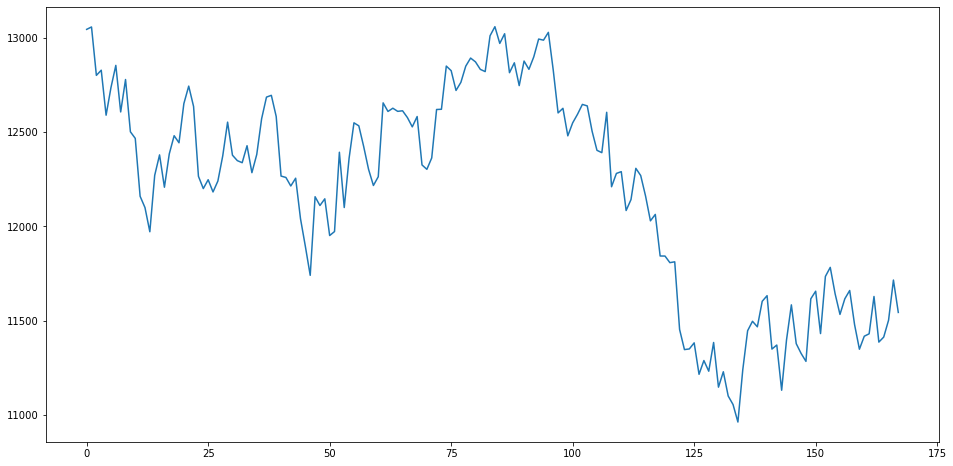

In [95]:
plt.figure(figsize = (16, 8))
plt.plot(dow_df['ADJ_CLOSE'])
plt.show()

#### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

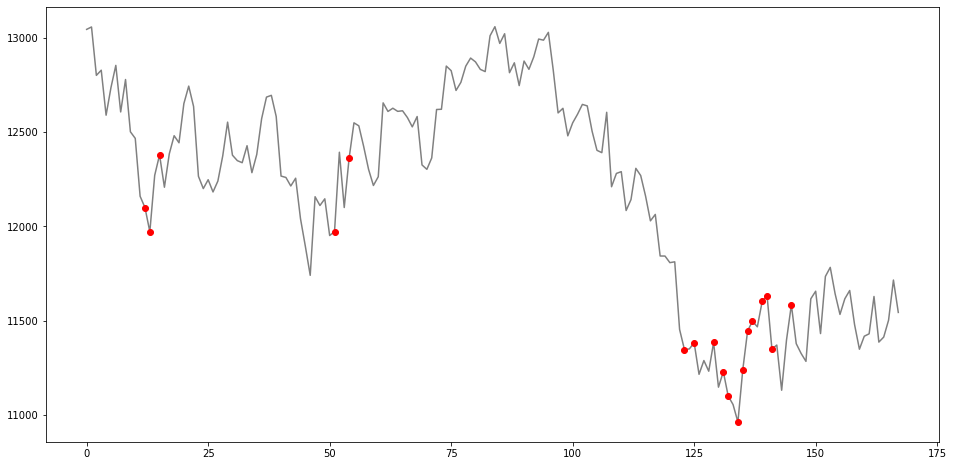

In [96]:
fig = plt.figure(figsize = (16, 8))
sub = fig.add_subplot(111)

dow_df['ADJ_CLOSE'].plot(ax = sub, color = 'grey')

sub.plot(dow_df.ADJ_CLOSE[dow_df.VOLUME > 5500000000].index, 
         dow_df.ADJ_CLOSE[dow_df.VOLUME > 5500000000], "o", color = 'red')
plt.show()

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>